## Assignment 2

## Data Transformation Pipeline
---

The purpose of this assignment is to work on data processing techniques with pandas, therefore explore its capabilities and limitations. You will look into performing some basic data cleaning methods, data consistency functions, pivot methods and have a general understanding of working with DataFrames as in-memory python objects.

The dataset will be used is a sample of an investment portfolio from 2014 to 2018 that contains company names, universe returns, sector, among others, you will create a data transformation pipeline that will generate a ready-to-use dataset for statistical analysis and reporting from this data having the raw data as input. Such pipeline will help to generalize the process and be applied to other datasets.

---

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('../datasets/pggm_dataset.csv')

1. Define a function that takes the dataset and creates a DataFrame which columns are:
‘Variable’, ‘Number of Nulls’, ‘Percentage of Nulls’

In [3]:
def missing_values_table(df): 
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum()/len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1).reset_index()
        mis_val_table = mis_val_table.rename(
            columns = {'index':'Variable', 
                       0 : 'Number of Nulls', 
                       1 : 'Percentage of Nulls'})
        return mis_val_table

In [4]:
missing_values_table(data)

,Variable,Number of Nulls,Percentage of Nulls
0,Identifier,0,0.000000
1,Name,0,0.000000
2,Period,0,0.000000
3,Period_YYYYMMDD,0,0.000000
4,Ticker,0,0.000000
5,Universe_Returns_F1W,4,0.010443
6,Universe_Returns_F4W,8,0.020886
7,Universe_Returns_F12W,36,0.093985
8,Weight,0,0.000000
9,GICS_Sector,0,0.000000


2. Create a function that replaces all the occurrences of the string “Inc.” for the string
“B.V.” in any given vector.

In [5]:
def find_replace(l, cases):
    for a, b in cases:
        l = [row.replace(a, b) for row in l]
    return l

In [6]:
cases ={
    ('Inc.','B.V.'),
    ('blue','Blue'),
    ('.',''),
    ('I','Y'),
    ('-',''),
    ('p','P')
    }

In [7]:
type(cases)

set

In [8]:
data.Name

0                          Cintas Corporation
1                           SCANA Corporation
2            L-3 Communications Holdings Inc.
3             United Technologies Corporation
4                Wisconsin Energy Corporation
                         ...                 
38299    Brookfield Property REIT Inc Class A
38300                               Linde plc
38301           Dell Technologies Inc Class C
38302                 Dell Technologies (Det)
38303                  Capri Holdings Limited
Name: Name, Length: 38304, dtype: object

3. Include a new variable in the dataset that corresponds the quarter of the year.

In [10]:
data.Period = [pd.to_datetime(i, format='%Y%m%d') for i in data.Period_YYYYMMDD]

In [11]:
pd.PeriodIndex(data.Period, freq='Q-MAR').strftime('Q%q')

Index(['Q3', 'Q3', 'Q3', 'Q3', 'Q3', 'Q3', 'Q3', 'Q3', 'Q3', 'Q3',
       ...
       'Q3', 'Q3', 'Q3', 'Q3', 'Q3', 'Q3', 'Q3', 'Q3', 'Q3', 'Q3'],
      dtype='object', name='Period', length=38304)

In [12]:
data['Quarter'] = pd.PeriodIndex(data.Period, freq='Q-MAR').strftime('Q%q')

In [13]:
data.head()

,Identifier,Name,Period,Period_YYYYMMDD,Ticker,Universe_Returns_F1W,Universe_Returns_F4W,Universe_Returns_F12W,Weight,GICS_Sector,GICS_Ind_Grp,Market_Cap_USD,Price_USD,NTM_EP,LTM_ROA,BP,LTM_EP,5Y_Sales_Growth,Quarter
0,17290810,Cintas Corporation,2014-12-31,20141231,CTAS-US,-2.517855,-0.121111,4.156041,0.000402,Industrials,Commercial & Professional Services,7761.120,78.44,0.044387,9.089989,0.246962,0.042708,4.718765,Q3
1,80589M10,SCANA Corporation,2014-12-31,20141231,SCG-US,2.036428,6.307948,-8.426744,0.000422,Utilities,Utilities,8151.001,60.40,0.061397,3.472852,0.572871,0.062748,-0.949881,Q3
2,50241310,L-3 Communications Holdings Inc.,2014-12-31,20141231,LLL-US,-0.396162,-1.283580,-0.753021,0.000563,Industrials,Capital Goods,10883.341,126.21,0.060554,4.744629,0.570099,0.059821,-4.316938,Q3
3,91301710,United Technologies Corporation,2014-12-31,20141231,UTX-US,-1.973909,1.669562,1.815629,0.005174,Industrials,Capital Goods,99942.990,115.00,0.062889,6.805052,0.325584,0.059088,3.083364,Q3
4,92939U10,Wisconsin Energy Corporation,2014-12-31,20141231,WEC-US,1.118696,7.679176,-6.160975,0.000616,Utilities,Utilities,11893.872,52.74,0.051359,4.201019,0.369798,0.050815,1.421392,Q3


4. Create a subset where the columns are the Quarter of the year, and Industry Group the Rows, agregating by ROA. Is there any pattern? Export the subset in csv.

In [14]:
quarter_group = \
    pd.pivot_table(data, 
                   values='LTM_ROA', 
                   index='GICS_Ind_Grp', 
                   columns='Quarter',
                   aggfunc='mean',
                   fill_value=0).T

In [15]:
#quarter_group.T

In [16]:
quarter_group = quarter_group[quarter_group.mean().sort_values(ascending=False).index]

In [17]:
quarter_group

GICS_Ind_Grp,Semiconductors & Semiconductor Equipment,Consumer Services,Transportation,Household & Personal Products,Food Beverage & Tobacco,Retailing,Commercial & Professional Services,Capital Goods,Consumer Durables & Apparel,Food & Staples Retailing,...,Diversified Financials,Media,Automobiles & Components,Pharmaceuticals Biotechnology & Life Sciences,Real Estate,Utilities,Energy,Insurance,Media & Entertainment,Banks
Quarter,,,,,,,,,,,,,,,,,,,,,
Q1,11.589568,12.237632,11.371819,10.369939,9.985385,9.656272,8.240517,7.035379,6.009177,6.048261,...,5.139919,4.755386,3.756846,1.711677,3.001839,2.506484,2.524588,1.956626,0.000000,1.018877
Q2,12.811544,13.037631,11.644001,10.813697,9.650519,10.234085,8.870785,7.358007,6.264084,7.050006,...,5.240579,4.732686,3.673743,4.313217,3.066965,2.541458,2.409214,2.048777,0.000000,1.087699
Q3,13.350461,12.741236,10.800704,10.599298,9.910466,9.887666,8.752008,7.586536,6.636719,6.750695,...,5.229576,4.797754,3.999376,5.021505,3.306205,2.408358,2.782611,2.310436,6.014303,1.108746
Q4,11.570475,11.183710,9.331235,10.199596,9.495991,9.208273,7.420434,7.159318,7.226165,5.922688,...,4.899855,4.657937,4.110035,1.847954,3.086908,2.282353,1.630256,1.806934,0.000000,0.989145


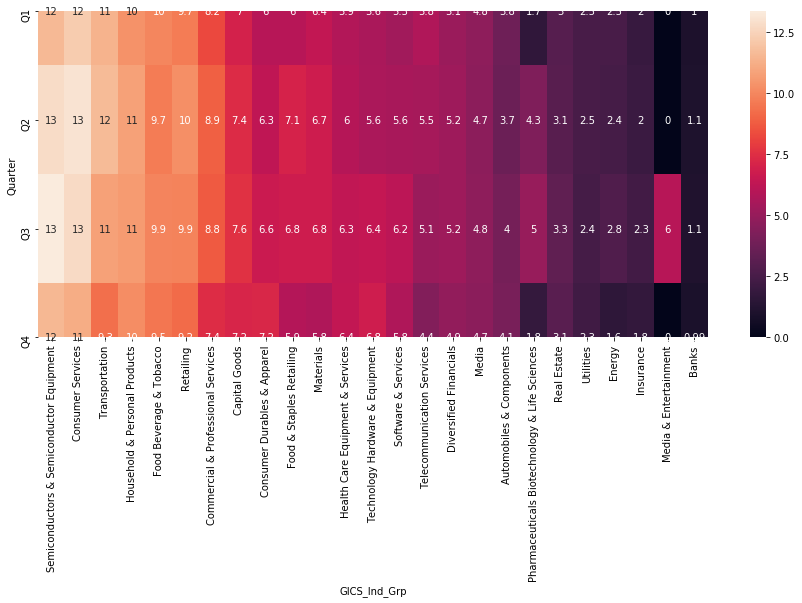

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,6))
sns.heatmap(quarter_group, annot=True, annot_kws={"size": 10})

5. Create a subset where the original dataset is sorted by Market Cap USD and determine which month has the highest value in the dataset.

In [19]:
data.Period = [pd.to_datetime(i, format='%Y%m%d') for i in data.Period_YYYYMMDD]
data['month'] = [date.month for date in data.Period]
data['day'] = [date.day for date in data.Period]
data['year'] = [date.year for date in data.Period]

In [20]:
market_sorted = data.sort_values(by='Market_Cap_USD',ascending=False)
market_sorted = market_sorted\
    .groupby(['year','month'])\
    .agg(['mean','count','max'])['Market_Cap_USD']

In [21]:
market_sorted

mean  count         max
year month                                 
2014 12     30610.662923    631   660940.75
2015 9      28112.869636    637   635441.60
2016 8      31952.329342    620   588280.25
     11     32266.540738    616   605365.00
2017 5      34772.696415    624   814564.10
     12     37684.622108   2532   900557.50
2018 1      39457.727861   3160   925092.30
     2      38283.681472   2528   920030.44
     3      38234.934084   2524   916166.60
     4      37676.186519   2524   913086.06
     5      38309.587983   3155   967099.00
     6      39193.988141   2511   984257.06
     7      39673.868663   2505   988519.20
     8      40611.186460   3130  1131403.40
     9      41077.593735   2502  1115097.40
     10     39412.431943   3120  1140656.10
     11     38757.069367   2493  1031933.25
     12     36547.138506   2492   853399.60

6. Which of the overall Industry Group has the lowest 5 years sales growth in average

In [22]:
data.groupby('GICS_Ind_Grp').mean()['5Y_Sales_Growth']

GICS_Ind_Grp
Automobiles & Components                          13.118361
Banks                                              4.518383
Capital Goods                                      3.899734
Commercial & Professional Services                11.808430
Consumer Durables & Apparel                       11.324569
Consumer Services                                  4.792705
Diversified Financials                             7.793248
Energy                                             9.061613
Food & Staples Retailing                           6.220548
Food Beverage & Tobacco                            2.498010
Health Care Equipment & Services                  10.815488
Household & Personal Products                      3.432638
Insurance                                          7.199322
Materials                                          1.865590
Media                                              1.216651
Media & Entertainment                              8.712180
Pharmaceuticals Biotechnolo

In [23]:
df_ind_grp = data.groupby('GICS_Ind_Grp').mean()['5Y_Sales_Growth'].sort_values().reset_index()

<BarContainer object of 25 artists>

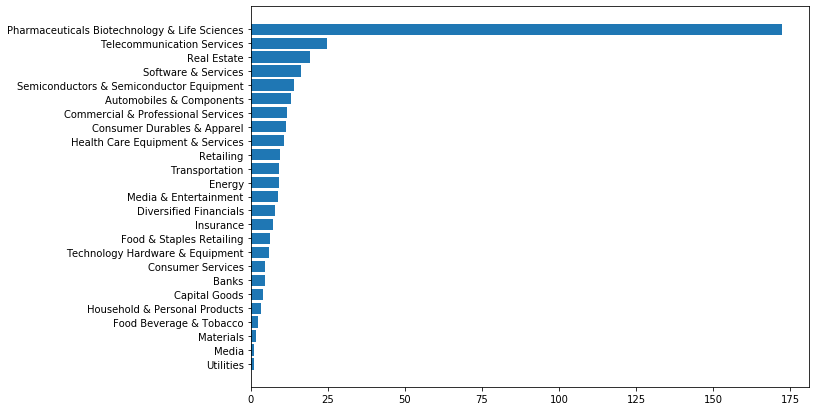

In [24]:
plt.figure(figsize=(10,7))
plt.barh(df_ind_grp.GICS_Ind_Grp,
         df_ind_grp['5Y_Sales_Growth'])

7. Which of the sectors has the highest 5 years sales growth in 2017

In [25]:
data[data.year == 2017]\
    .groupby('GICS_Ind_Grp')\
    .mean()['5Y_Sales_Growth']\
    .sort_values(ascending=False)\
    .reset_index()

,GICS_Ind_Grp,5Y_Sales_Growth
0,Pharmaceuticals Biotechnology & Life Sciences,379.539412
1,Telecommunication Services,28.247903
2,Real Estate,21.425885
3,Software & Services,16.071984
4,Automobiles & Components,14.075011
5,Consumer Durables & Apparel,12.595051
6,Health Care Equipment & Services,11.838645
7,Semiconductors & Semiconductor Equipment,11.600255
8,Commercial & Professional Services,11.357193
9,Retailing,9.356925


8. Create a subset of the portfolio which includes all the values where Universe Returns indexes higher than the 75 percentile.

In [26]:
data.describe().loc['max','Universe_Returns_F1W']

46.864033

In [27]:
summary = data.describe().loc['75%', 
                              ['Universe_Returns_F1W',
                               'Universe_Returns_F4W',
                               'Universe_Returns_F12W']]

In [28]:
my_summary = data.describe()

In [29]:
my_summary.loc['75%','5Y_Sales_Growth']

11.886979

In [30]:
summary.reset_index()

,index,75%
0,Universe_Returns_F1W,2.159980
1,Universe_Returns_F4W,4.400995
2,Universe_Returns_F12W,6.686374


In [31]:
summary.Universe_Returns_F1W

2.1599797499999998

In [32]:
universe_returns_75perc = \
    data[
     (data.Universe_Returns_F1W > summary.Universe_Returns_F1W) &
     (data.Universe_Returns_F4W > summary.Universe_Returns_F4W) &
     (data.Universe_Returns_F12W> summary.Universe_Returns_F12W)
    ]

In [33]:
universe_returns_75perc.head(10)

,Identifier,Name,Period,Period_YYYYMMDD,Ticker,Universe_Returns_F1W,Universe_Returns_F4W,Universe_Returns_F12W,Weight,GICS_Sector,...,Price_USD,NTM_EP,LTM_ROA,BP,LTM_EP,5Y_Sales_Growth,Quarter,month,day,year
12,26441150,Duke Realty Corporation,2014-12-31,20141231,DRE-US,4.504955,10.396028,8.271610,0.000357,Financials,...,20.200000,0.004120,3.146236,0.412802,0.033050,-0.216620,Q3,12,31,2014
20,10113710,Boston Scientific Corporation,2014-12-31,20141231,BSX-US,5.886793,10.113203,32.226418,0.000909,Health Care,...,13.250000,0.068196,1.712502,0.380982,0.016075,-2.550075,Q3,12,31,2014
29,22822V10,Crown Castle International Corp,2014-12-31,20141231,CCI-US,2.287173,10.749685,8.567882,0.001360,Financials,...,78.700000,0.016823,1.204316,0.260514,0.006607,16.179829,Q3,12,31,2014
70,61174X10,Monster Beverage Corporation,2014-12-31,20141231,MNST-US,7.023537,10.023081,25.542223,0.000797,Consumer Staples,...,36.116666,0.029585,25.717973,0.076293,0.023072,16.936647,Q3,12,31,2014
79,25339310,"Dick's Sporting Goods, Inc.",2014-12-31,20141231,DKS-US,10.795557,10.473310,16.739559,0.000248,Consumer Discretionary,...,49.650000,0.063510,9.346824,0.285530,0.053575,8.519749,Q3,12,31,2014
85,G3040110,Endo International Plc,2014-12-31,20141231,ENDP-US,6.738770,12.583184,22.407091,0.000544,Health Care,...,72.120000,0.064653,-15.867955,0.224385,-0.161675,14.404022,Q3,12,31,2014
91,58155Q10,McKesson Corporation,2014-12-31,20141231,MCK-US,3.454089,4.990852,8.756077,0.002489,Health Care,...,207.580000,0.058663,3.227526,0.185450,0.026805,6.146644,Q3,12,31,2014
93,65163910,Newmont Mining Corporation,2014-12-31,20141231,NEM-US,6.296301,28.359795,19.078386,0.000488,Materials,...,18.900000,0.053078,-2.561633,1.101448,-0.070899,2.535782,Q3,12,31,2014
105,50540R40,Laboratory Corporation of America Holdings,2014-12-31,20141231,LH-US,4.300272,7.034290,17.599630,0.000474,Health Care,...,107.900000,0.067864,7.441894,0.303538,0.055329,4.857706,Q3,12,31,2014
108,94184810,Waters Corporation,2014-12-31,20141231,WAT-US,2.847767,5.526960,7.824695,0.000490,Health Care,...,112.720000,0.052558,11.757288,0.196517,0.043825,4.167041,Q3,12,31,2014


9. Create a function that can label any given vector in a dicotomic way: above the median and below the median.

In [34]:
def dicotomic_label(vector):
    """Creates a dicotomic label 
    1: Above the median
    0: Below the median"""
    label = []
    for i in vector:
        if i >= vector.median():
            label.append(1)
        else:
            label.append(0)
    return label

In [35]:
dicotomic_label?

Signature: dicotomic_label(vector)
Docstring:
Creates a dicotomic label 
1: Above the median
0: Below the median
File:      ~/data-science-bootcamp/notebooks/<ipython-input-34-5217586d257c>
Type:      function


In [36]:
data['Above_median'] = dicotomic_label(data.Weight)

In [37]:
data['flag_dollars'] = dicotomic_label(data.Price_USD)

In [38]:
data[data.flag_dollars == 1]

,Identifier,Name,Period,Period_YYYYMMDD,Ticker,Universe_Returns_F1W,Universe_Returns_F4W,Universe_Returns_F12W,Weight,GICS_Sector,...,LTM_ROA,BP,LTM_EP,5Y_Sales_Growth,Quarter,month,day,year,Above_median,flag_dollars
0,17290810,Cintas Corporation,2014-12-31,20141231,CTAS-US,-2.517855,-0.121111,4.156041,0.000402,Industrials,...,9.089989,0.246962,0.042708,4.718765,Q3,12,31,2014,0,1
2,50241310,L-3 Communications Holdings Inc.,2014-12-31,20141231,LLL-US,-0.396162,-1.283580,-0.753021,0.000563,Industrials,...,4.744629,0.570099,0.059821,-4.316938,Q3,12,31,2014,0,1
3,91301710,United Technologies Corporation,2014-12-31,20141231,UTX-US,-1.973909,1.669562,1.815629,0.005174,Industrials,...,6.805052,0.325584,0.059088,3.083364,Q3,12,31,2014,1,1
7,03662Q10,"ANSYS, Inc.",2014-12-31,20141231,ANSS-US,-2.792686,-0.493902,5.390239,0.000391,Information Technology,...,9.653068,0.303087,0.033780,12.523060,Q3,12,31,2014,0,1
9,29444U70,"Equinix, Inc.",2014-12-31,20141231,EQIX-US,-2.902132,-4.247337,1.677120,0.000624,Information Technology,...,1.895395,0.202957,0.011752,23.247128,Q3,12,31,2014,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38282,98138H10,"Workday, Inc. Class A",2018-12-26,20181226,WDAY-US,3.855407,9.199662,9.199662,0.001034,Information Technology,...,-8.426479,0.051274,-0.011429,47.285164,Q3,12,26,2018,1,1
38284,70450Y10,PayPal Holdings Inc,2018-12-26,20181226,PYPL-US,3.562796,9.541062,9.541062,0.004283,Information Technology,...,5.137142,0.149529,0.020044,18.677155,Q3,12,26,2018,1,1
38297,98155810,"Worldpay, Inc. Class A",2018-12-26,20181226,WP-US,0.932705,5.169887,5.169887,0.001042,Information Technology,...,-0.887806,0.403495,-0.008520,16.212727,Q3,12,26,2018,1,1
38300,G5494J10,Linde plc,2018-12-26,20181226,LIN-US,2.919984,5.964384,5.964384,0.003869,Materials,...,7.117014,0.136119,0.031020,0.898848,Q3,12,26,2018,1,1


In [39]:
data.groupby('GICS_Sector').count()['Identifier']

GICS_Sector
Communication Services     505
Consumer Discretionary    6043
Consumer Staples          2197
Energy                    2357
Financials                5544
Health Care               4200
Industrials               5248
Information Technology    6117
Materials                 1871
Real Estate               2264
Utilities                 1958
Name: Identifier, dtype: int64

In [40]:
data.groupby('GICS_Sector').count()['Identifier']

GICS_Sector
Communication Services     505
Consumer Discretionary    6043
Consumer Staples          2197
Energy                    2357
Financials                5544
Health Care               4200
Industrials               5248
Information Technology    6117
Materials                 1871
Real Estate               2264
Utilities                 1958
Name: Identifier, dtype: int64

In [41]:
g = data.groupby('GICS_Sector')

In [42]:
balanced_sectors_data = g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True))

In [43]:
balanced_sectors_data

Identifier                                Name  \
GICS_Sector                                                                 
Communication Services 0     87259010                   T-Mobile US, Inc.   
                       1     87259010                   T-Mobile US, Inc.   
                       2     92343V10         Verizon Communications Inc.   
                       3     98919V10           Zayo Group Holdings, Inc.   
                       4     65249B10            News Corporation Class A   
...                               ...                                 ...   
Utilities              500   03042010  American Water Works Company, Inc.   
                       501   00130H10                     AES Corporation   
                       502   26441C20             Duke Energy Corporation   
                       503   30161N10                  Exelon Corporation   
                       504   92939U10                WEC Energy Group Inc   

                               Period  Period_YYYYMMDD   Ticker  \
GICS_Sector                                                       
Communication Services 0   2018-02-21         20180221  TMUS-US   
                       1   2016-08-31         20160831  TMUS-US   
                       2   2018-01-31         20180131    VZ-US   
                       3   2018-02-28         20180228  ZAYO-US   
                       4   2018-12-04         20181204  NWSA-US   
...                               ...              ...      ...   
Utilities              500 2018-01-31         20180131   AWK-US   
                       501 2018-03-14         20180314   AES-US   
                       502 2015-09-30         20150930   DUK-US   
                       503 2018-02-28         20180228   EXC-US   
                       504 2018-01-10         20180110   WEC-US   

                            Universe_Returns_F1W  Universe_Returns_F4W  \
GICS_Sector                                                              
Communication Services 0                2.002692              5.334902   
                       1                0.841606              1.014245   
                       2               -5.659336            -11.707044   
                       3                0.976300             -6.722456   
                       4               -1.241279            -11.636925   
...                                          ...                   ...   
Utilities              500             -5.771619             -4.079467   
                       501              0.934589              6.728971   
                       502              1.014733             -0.542116   
                       503             -0.593954              4.049671   
                       504             -0.157058             -5.983978   

                            Universe_Returns_F12W    Weight  \
GICS_Sector                                                   
Communication Services 0                -4.863679  0.000713   
                       1                17.263699  0.000670   
                       2                -6.177211  0.008721   
                       3                -3.124124  0.000273   
                       4                -5.508146  0.000207   
...                                           ...       ...   
Utilities              500               2.435303  0.000586   
                       501              18.157650  0.000287   
                       502               1.309001  0.002778   
                       503               9.731793  0.001462   
                       504              -0.173551  0.000817   

                                       GICS_Sector  ...   LTM_ROA        BP  \
GICS_Sector                                         ...                       
Communication Services 0    Communication Services  ...  6.464716  0.403218   
                       1    Communication Services  ...  1.880221  0.456273   
                       2    Communication Services  ..

10. Create an excel file which contains 3 different sheets respectively for 2016, 2017,2018. Each including the same combination of the portfolio. The portfolio should be equally represented by all sectors.

In [44]:
excelbook = pd.ExcelWriter('portfolio.xlsx')

In [45]:
balanced_sectors_data

Identifier                                Name  \
GICS_Sector                                                                 
Communication Services 0     87259010                   T-Mobile US, Inc.   
                       1     87259010                   T-Mobile US, Inc.   
                       2     92343V10         Verizon Communications Inc.   
                       3     98919V10           Zayo Group Holdings, Inc.   
                       4     65249B10            News Corporation Class A   
...                               ...                                 ...   
Utilities              500   03042010  American Water Works Company, Inc.   
                       501   00130H10                     AES Corporation   
                       502   26441C20             Duke Energy Corporation   
                       503   30161N10                  Exelon Corporation   
                       504   92939U10                WEC Energy Group Inc   

                               Period  Period_YYYYMMDD   Ticker  \
GICS_Sector                                                       
Communication Services 0   2018-02-21         20180221  TMUS-US   
                       1   2016-08-31         20160831  TMUS-US   
                       2   2018-01-31         20180131    VZ-US   
                       3   2018-02-28         20180228  ZAYO-US   
                       4   2018-12-04         20181204  NWSA-US   
...                               ...              ...      ...   
Utilities              500 2018-01-31         20180131   AWK-US   
                       501 2018-03-14         20180314   AES-US   
                       502 2015-09-30         20150930   DUK-US   
                       503 2018-02-28         20180228   EXC-US   
                       504 2018-01-10         20180110   WEC-US   

                            Universe_Returns_F1W  Universe_Returns_F4W  \
GICS_Sector                                                              
Communication Services 0                2.002692              5.334902   
                       1                0.841606              1.014245   
                       2               -5.659336            -11.707044   
                       3                0.976300             -6.722456   
                       4               -1.241279            -11.636925   
...                                          ...                   ...   
Utilities              500             -5.771619             -4.079467   
                       501              0.934589              6.728971   
                       502              1.014733             -0.542116   
                       503             -0.593954              4.049671   
                       504             -0.157058             -5.983978   

                            Universe_Returns_F12W    Weight  \
GICS_Sector                                                   
Communication Services 0                -4.863679  0.000713   
                       1                17.263699  0.000670   
                       2                -6.177211  0.008721   
                       3                -3.124124  0.000273   
                       4                -5.508146  0.000207   
...                                           ...       ...   
Utilities              500               2.435303  0.000586   
                       501              18.157650  0.000287   
                       502               1.309001  0.002778   
                       503               9.731793  0.001462   
                       504              -0.173551  0.000817   

                                       GICS_Sector  ...   LTM_ROA        BP  \
GICS_Sector                                         ...                       
Communication Services 0    Communication Services  ...  6.464716  0.403218   
                       1    Communication Services  ...  1.880221  0.456273   
                       2    Communication Services  ..

In [46]:
balanced_sectors_data[balanced_sectors_data.year == 2016].to_excel(excelbook, '2016')
balanced_sectors_data[balanced_sectors_data.year == 2017].to_excel(excelbook, '2017')
balanced_sectors_data[balanced_sectors_data.year == 2018].to_excel(excelbook, '2018')
excelbook.save()

In [47]:
!rm portfolio.xlsx

11. Perform an inner join between the dataset generated as output in the notebook 2 and the PGGM portfolio dataset.  
- How many matches are there?
- Is there any patter now that we have the location?

In [48]:
#reading the ticker file
cik_ticker = pd.read_csv('../datasets/cik_ticker.csv', sep='|')

In [49]:
cik_ticker.head()

,CIK,Ticker,Name,Exchange,SIC,Business,Incorporated,IRS
0,1090872,A,Agilent Technologies Inc,NYSE,3825.0,CA,DE,770518772.0
1,4281,AA,Alcoa Inc,NYSE,3350.0,PA,PA,250317820.0
2,1332552,AAACU,Asia Automotive Acquisition Corp,NaN,6770.0,DE,DE,203022522.0
3,1287145,AABB,Asia Broadband Inc,OTC,8200.0,GA,NV,721569126.0
4,1024015,AABC,Access Anytime Bancorp Inc,NaN,6035.0,NM,DE,850444597.0


In [50]:
cik_ticker['Ticker'] = [i+'-US' for i in cik_ticker.Ticker]

In [51]:
len(cik_ticker)

13737

In [52]:
len(data)

38304

In [53]:
tickers_A = list(data.Ticker)
tickers_B = list(cik_ticker.Ticker)

In [54]:
ticker_matches = list(set(tickers_B)- set(tickers_A))

In [55]:
len(ticker_matches)

12382

In [56]:
len(ticker_matches) / len(cik_ticker)

0.901361287035015

In [57]:
df_merged = pd.merge(data, cik_ticker, on='Ticker', how='left')

In [58]:
df_merged.head()

,Identifier,Name_x,Period,Period_YYYYMMDD,Ticker,Universe_Returns_F1W,Universe_Returns_F4W,Universe_Returns_F12W,Weight,GICS_Sector,...,year,Above_median,flag_dollars,CIK,Name_y,Exchange,SIC,Business,Incorporated,IRS
0,17290810,Cintas Corporation,2014-12-31,20141231,CTAS-US,-2.517855,-0.121111,4.156041,0.000402,Industrials,...,2014,0,1,723254.0,Cintas Corp,NASDAQ,2320.0,OH,WA,311188630.0
1,80589M10,SCANA Corporation,2014-12-31,20141231,SCG-US,2.036428,6.307948,-8.426744,0.000422,Utilities,...,2014,0,0,91882.0,South Carolina Electric & Gas Co,NYSE,4931.0,SC,SC,570248695.0
2,80589M10,SCANA Corporation,2014-12-31,20141231,SCG-US,2.036428,6.307948,-8.426744,0.000422,Utilities,...,2014,0,0,754737.0,Scana Corp,NYSE,4931.0,SC,SC,570784499.0
3,50241310,L-3 Communications Holdings Inc.,2014-12-31,20141231,LLL-US,-0.396162,-1.283580,-0.753021,0.000563,Industrials,...,2014,0,1,1056239.0,L 3 Communications Holdings Inc,NYSE,3663.0,NY,DE,133937434.0
4,91301710,United Technologies Corporation,2014-12-31,20141231,UTX-US,-1.973909,1.669562,1.815629,0.005174,Industrials,...,2014,1,1,101829.0,United Technologies Corp,NYSE,3724.0,CT,DE,60570975.0
